# Assignment :  Week 4  

## Week 4 Comprehensive Assignment: Predictive Modeling for Customer Churn   

## *Objective: To build a predictive model that can identify customers at high risk of churning from a telecom company. * 

# Tasks: 

## 1. **Data Exploration and Preprocessing:** 

In [1]:
# importing libraries : 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
# 1.1 - Load the dataset using Pandas. 

df = pd.read_csv("churn80.csv")
df_test = pd.read_csv("churn20.csv")   

In [3]:
# 1.2 - Perform exploratory data analysis to understand the distribution of data, missing values, and outliers. 

# Displaying the first few rows of the dataset to get an overview
print(df.head())  

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [4]:
# Checking basic statistics of numeric features
print(df.describe())  

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.21573

In [5]:
# Checking data types and missing values
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)  


Missing Values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [7]:
# Identifying outliers: 
# Calculate IQR manually for each numeric column
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using logical_xor
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (
    (df.select_dtypes(include=[np.number]) < lower_bound) |
    (df.select_dtypes(include=[np.number]) > upper_bound)
)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print(outlier_counts) 
 


Account length             12
Area code                   0
Number vmail messages       2
Total day minutes          21
Total day calls            18
Total day charge           21
Total eve minutes          17
Total eve calls            15
Total eve charge           17
Total night minutes        22
Total night calls          19
Total night charge         22
Total intl minutes         37
Total intl calls           66
Total intl charge          40
Customer service calls    210
dtype: int64


In [8]:
# Remove outliers from the DataFrame
df1 = df[~outliers.any(axis=1)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df1)


DataFrame without outliers:
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day c

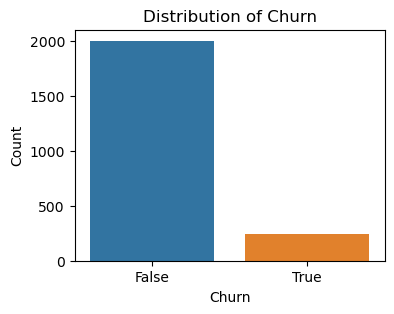

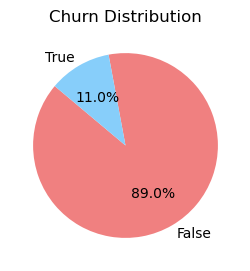

In [10]:
# Visualizing the distribution of the target variable (Churn: Yes/No)
plt.figure(figsize=(4, 3))
sns.countplot(x='Churn', data=df1)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show() 
import matplotlib.pyplot as plt


# Counting the number of 'Churn' values (Yes and No)
churn_counts = df1['Churn'].value_counts()

# Creating a pie chart
plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Churn Distribution')
plt.show()


## 2. **Feature Engineering:**   

In [11]:
## 2.1 - Convert categorical variables into numerical format using techniques like one-hot encoding. 

# Creating a list of categorical columns
categorical_columns = ['State', 'International plan', 'Voice mail plan'] 

# Applying one-hot encoding to each categorical column
df2 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)  

In [12]:
# 2.2 - Normalize or standardize the features if required 

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df2[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']] = scaler.fit_transform(df2[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']])

scaler = StandardScaler()
df2[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']] = scaler.fit_transform(df2[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']])


In [13]:
# 2.3 Use correlation or feature importance methods to identify the most significant features. 


In [14]:
# 2.3.1 using correlation matrix: 
correlation = df2.corr()

correlation_with_target = correlation['Churn'].sort_values(ascending=False)

print(correlation_with_target) 


Churn                     1.000000
International plan_Yes    0.307853
Total day minutes         0.290733
Total day charge          0.290729
Total eve minutes         0.112163
                            ...   
State_WI                 -0.036432
State_WV                 -0.049315
Total intl calls         -0.076117
Number vmail messages    -0.083436
Voice mail plan_Yes      -0.095378
Name: Churn, Length: 69, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_3220\3828419381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1 = df1.corr()


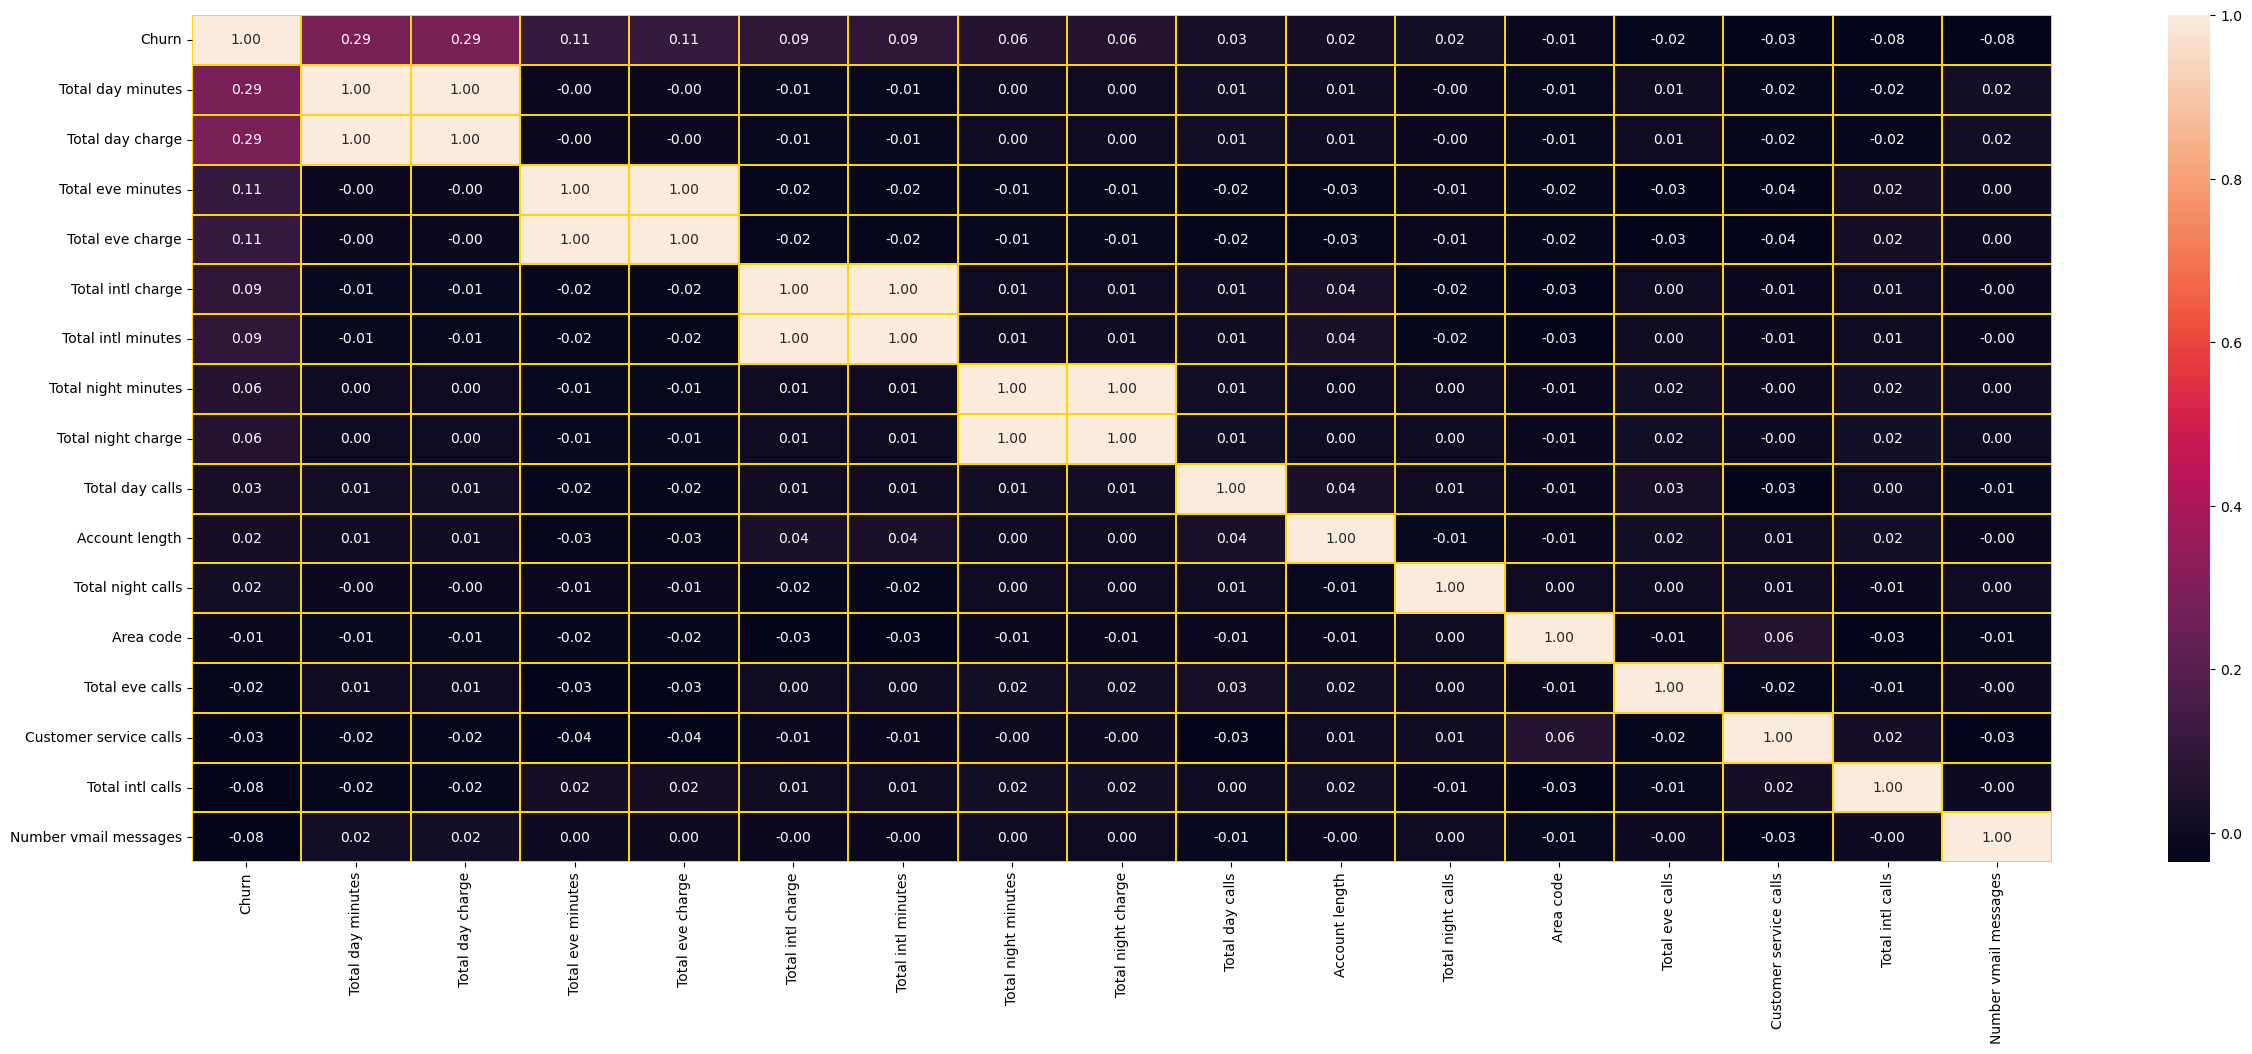

In [15]:
correlation1 = df1.corr() 
correlation_with_target1 = correlation1['Churn'].sort_values(ascending=False) 

top_40_columns = correlation_with_target1.head(40).index.tolist()

plt.figure(figsize=(30, 11))
sns.heatmap(df1[top_40_columns].corr(), annot=True, fmt=".2f", robust=True, linewidths=1.3, linecolor='gold')
plt.show()


Total day minutes         0.141376
Total day charge          0.126455
International plan_Yes    0.083419
Total eve charge          0.057574
Total eve minutes         0.055970
                            ...   
State_KY                  0.000893
State_WV                  0.000712
State_HI                  0.000430
State_AL                  0.000381
State_IA                  0.000130
Length: 68, dtype: float64


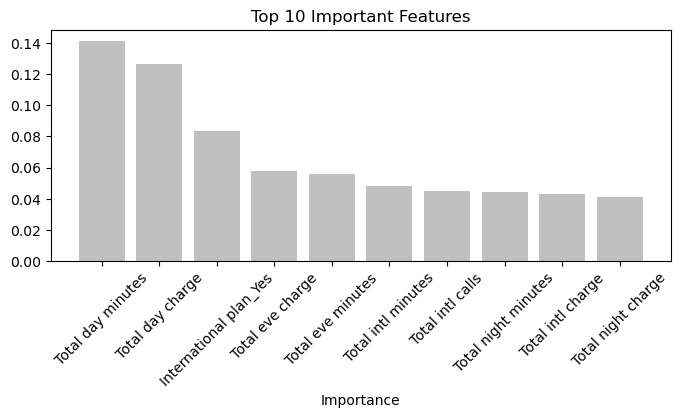

In [46]:
# Using from sklearn.ensemble import RandomForestClassifier
# As'Churn' is our target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Initialize a Random Forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = model.feature_importances_

feature_importance_series = pd.Series(feature_importance, index=X.columns)
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

top_n = 10  # Number of top features to display
print(sorted_feature_importance)
# Selecting the top N important features
top_features = sorted_feature_importance[:top_n]

# Plot the top N features and their importance scores
plt.figure(figsize=(8, 3))
plt.bar(top_features.index, top_features.values, color='silver')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Important Features')
#plt.gca().invert_yaxis()  
plt.xticks(rotation = 45)
plt.show() 


## 3. **Model Building:**   

In [49]:
# 3.1 - Split the dataset into training and testing sets. 
from sklearn.model_selection import train_test_split

# df2 is preprocessed dataset and X contains features, y contains the target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

X = np.array(X)
y = np.array(y)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 


X_train shape: (1796, 68)
X_test shape: (450, 68)
y_train shape: (1796,)
y_test shape: (450,)


In [18]:
# 3.2 - Implement the following algorithms:
# 3.2.1- Decision Trees
# 3.2.2- K Nearest Neighbours (KNN)
# 3.2.3- Neural Network using TensorFlow and Keras
# 3.2.4- Ensemble method of your choice (e.g., Random Forest, Gradient Boosting)
# - For each model, ensure you are tuning hyperparameters using techniques like grid search or random search. 


In [19]:
# 3.2.1 Decision Trees : 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier() 

# Defining hyperparameters and their potential values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Train the Decision Tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)

In [20]:
# 3.2.2- K Nearest Neighbours (KNN) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Creating a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Defining hyperparameters and their potential values for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Performing grid search for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [21]:
# 3.2.3- Neural Network using TensorFlow and Keras 

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_nn_classifier = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])
best_nn_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
best_nn_classifier.fit(X_train, y_train, epochs=20, batch_size=64)


Epoch 1/20
29/29 [==============================] - 1s 2ms/step - loss: 14.7236 - accuracy: 0.7227
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 2.5369 - accuracy: 0.8185
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.8272 - accuracy: 0.8207
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.8374
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8658
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8764
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8758
Epoch 8/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.8402
Epoch 9/20
29/29 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8669
Epoch 10/20
29/29 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8920
Epoch 11/20
29/29 

In [22]:
# 3.2.4- Ensemble method of your choice (e.g., Random Forest, Gradient Boosting)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Defining hyperparameters and their potential values for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 0.5, 0.7],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Performing random search for hyperparameter tuning
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = random_search.best_params_

# Training the Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=4,
                       n_estimators=300)

## 4. **Model Evaluation:** 

In [23]:
# 4.1 - Evaluate each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
# 4.2 - Plot the ROC curve and compute the AUC for each model.
# 4.3 - Discuss the performance of each model and identify the best performing model. 

In [29]:
# 4.1 - Evaluate each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score). 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
def modeling(model1):

    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
   
    #Performance evaluation
    def print_scores(model, y_true, y_pred):
        print(model)
        acc_score1 = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score1)
        pre_score1 = precision_score(y_true, y_pred)
        print("precision: ",pre_score1)
        rec_score1 = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score1)
        f_score1 = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score1)        
   
    print_scores(model1, y_test, y_pred1)  
    
    
    cm = confusion_matrix(y_test, y_pred1)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])
    cmd_obj.plot()

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)
accuracy:  0.9577777777777777
precision:  0.8157894736842105
recall:  0.7209302325581395
f1_score:  0.9566035062331358


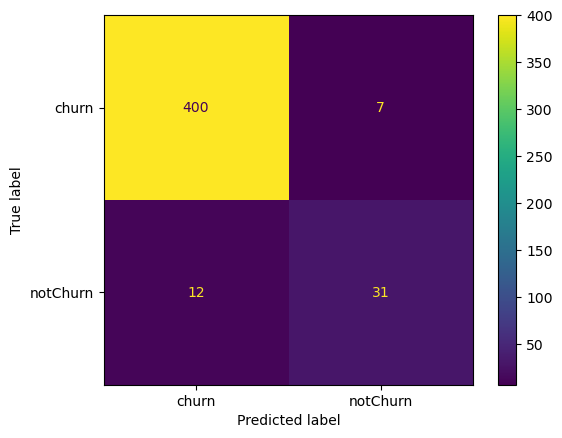

In [30]:
# 4.1.1 
modeling(best_dt_classifier) 
# print_scores(best_dt_classifier, y_test, y_pred) 

KNeighborsClassifier()
accuracy:  0.9044444444444445
precision:  0.5
recall:  0.09302325581395349
f1_score:  0.8736254109024842


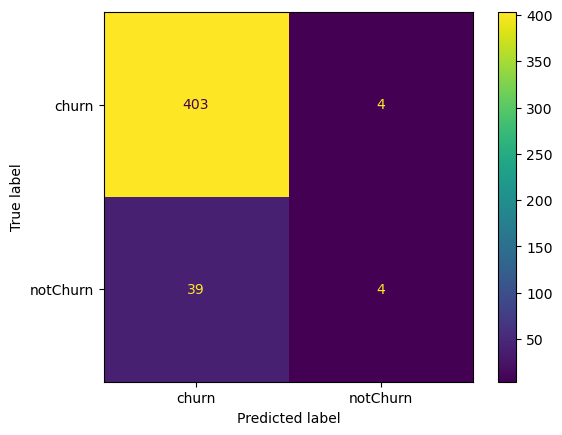

In [31]:
# 4.1.2
modeling(best_knn_classifier) 
# print_scores(best_knn_classifier, y_test, y_pred) 

15/15 [==============================] - 0s 1ms/step
accuracy:  0.9044444444444445
precision:  0.0
recall:  0.0
f1_score:  0.8590639180604175


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


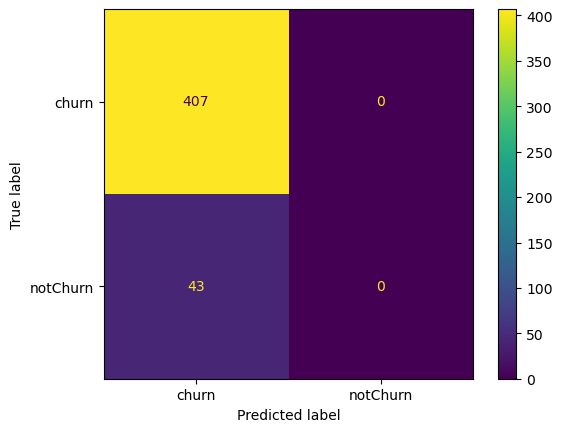

In [32]:
# 4.1.3 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_nn_classifier.fit(X_train, y_train)
y_pred = best_nn_classifier.predict(X_test) 

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_pred = y_pred_binary
# Compute classification metrics

def print_scores(model, y_true, y_pred):
    print(model)
    acc_score1 = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score1)
    pre_score1 = precision_score(y_true, y_pred)
    print("precision: ",pre_score1)
    rec_score1 = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score1)
    f_score1 = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score1) 
    
   
print_scores(best_nn_classifier, y_test, y_pred)  
    
    
cm = confusion_matrix(y_test, y_pred)
#Create the Confusion Matrix Display Object(cmd_obj). 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])
cmd_obj.plot()


RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=4,
                       n_estimators=300)
accuracy:  0.9688888888888889
precision:  0.9393939393939394
recall:  0.7209302325581395
f1_score:  0.9670308862771815


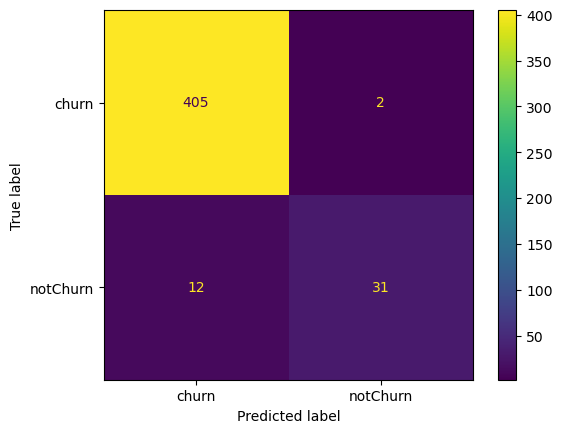

In [33]:
# 4.1.4 
modeling(best_rf_classifier) 
# print_scores(best_rf_classifier, y_test, y_pred) 

0.8518656076795612
0.5415976229929719
15/15 [==============================] - 0s 2ms/step
0.8272098737215017
0.8580081138220672


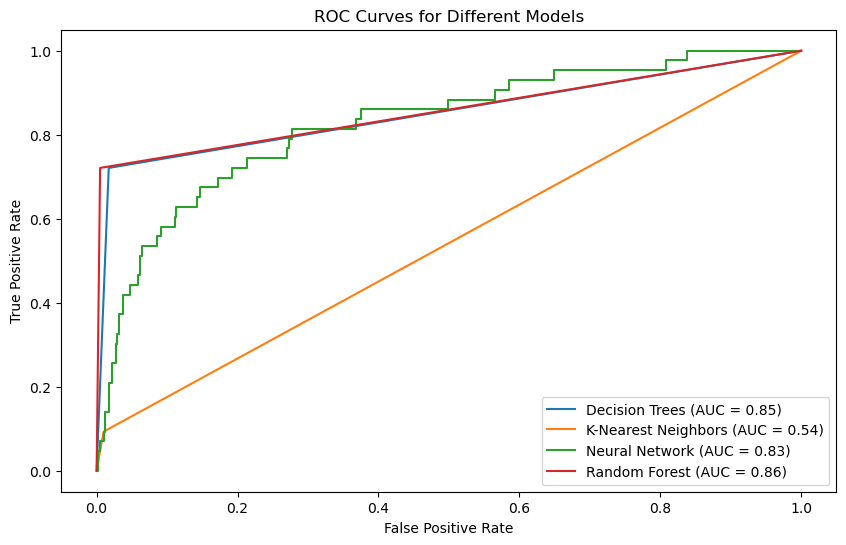

In [51]:
# 4.2 - Plot the ROC curve and compute the AUC for each model.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Defining the models and their names
models = [best_dt_classifier, best_knn_classifier, best_nn_classifier, best_rf_classifier]
model_names = ['Decision Trees', 'K-Nearest Neighbors', 'Neural Network', 'Random Forest']

# Creating a figure
plt.figure(figsize=(10, 6))

for model, model_name in zip(models, model_names):
    # Get predicted probabilities for positive class (Churn)
    y_prob = model.predict(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_name, roc_auc))

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# 5. **Transfer Learning (Bonus Task):**  

In [35]:
# - Use a pre-trained model (from any domain) and fine-tune it on the telecom dataset.
# - Compare its performance with the models built from scratch. 

15/15 [==============================] - 11s 743ms/step
accuracy:  0.9044444444444445
precision:  0.0
recall:  0.0
f1_score:  0.8590639180604175


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


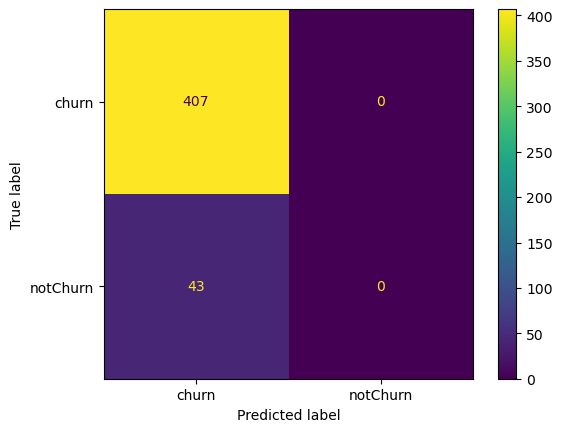

In [43]:
y_pred = model.predict(X_test) 

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_pred = y_pred_binary
# Compute classification metrics

def print_scores(model, y_true, y_pred):
    print(model)
    acc_score1 = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score1)
    pre_score1 = precision_score(y_true, y_pred)
    print("precision: ",pre_score1)
    rec_score1 = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score1)
    f_score1 = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score1) 
    
   
print_scores(model, y_test, y_pred)  
    
    
cm = confusion_matrix(y_test, y_pred)
#Create the Confusion Matrix Display Object(cmd_obj). 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])
cmd_obj.plot()
